<a href="https://colab.research.google.com/github/kapilsingh9069/Titanic_EDA/blob/master/titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

titanic = pd.read_csv('https://gist.githubusercontent.com/avmain/284b549eabc13061ce2b0b58b163c7f9/raw/ff20885745fea9ab5be6e900aad4c2cb1d08f936/titanic_data_set.csv',error_bad_lines=False)

titanic.head()




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andrew, Mr. Edgardo Samuel",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic = titanic.drop(['Cabin'], axis=1)

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
titanic['Age'] = titanic['Age'].mean()

In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [ ]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# *Replacing using imputer*

In [ ]:
# missing values in Age

#from sklearn.preprocessing import Imputer
#age_imputer = Imputer(missing_values='NaN', stratergy='mean', axis=0)
#age_imputer = age_imputer.fit(titanic.iloc[:, [5]])
#titanic.iloc[:,[5]] = age_imputer.transform(titanic.iloc[:, [5]])
#print titanic.head()

In [ ]:
# missing value in Embarked
titanic['Embarked'].count()

889

In [ ]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic['Embarked'].isnull().sum()

2

In [ ]:
titanic['Embarked'] = titanic['Embarked'].fillna('s')

In [ ]:
titanic['Embarked'].fillna('s')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
s      2
Name: Embarked, dtype: int64

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# ***label encoder***

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
titanic.iloc[:, [4]] = labelencoder_sex.fit_transform(titanic.iloc[:, [4]])



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,29.699118,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,29.699118,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,29.699118,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,29.699118,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,29.699118,0,0,373450,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_embarked = LabelEncoder()
titanic.iloc[:,[10]] = labelencoder_embarked.fit_transform(titanic.iloc[:,[10]])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
titanic = pd.get_dummies(titanic,columns=['Pclass','Embarked'])
titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Embarked_3
0,1,0,"Braund, Mr. Owen Harris",1,29.699118,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,29.699118,1,0,PC 17599,71.2833,1,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,29.699118,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,29.699118,1,0,113803,53.1000,1,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",1,29.699118,0,0,373450,8.0500,0,0,1,0,0,1,0


In [ ]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Embarked_3,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,29.699118,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,29.699118,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,29.699118,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,29.699118,1,0,113803,53.1000,1,0,0,0,0,1,0,2
4,5,0,"Allen, Mr. William Henry",1,29.699118,0,0,373450,8.0500,0,0,1,0,0,1,0,1


In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_0     0
Embarked_1     0
Embarked_2     0
Embarked_3     0
FamilySize     0
dtype: int64

In [ ]:
survived = titanic[titanic['Survived'] == 1]
not_survived = titanic[titanic['Survived'] == 0]
titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Embarked_3,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,29.699118,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,29.699118,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,29.699118,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,29.699118,1,0,113803,53.1000,1,0,0,0,0,1,0,2
4,5,0,"Allen, Mr. William Henry",1,29.699118,0,0,373450,8.0500,0,0,1,0,0,1,0,1


In [ ]:
titanic['Gender'] = titanic.Sex.apply(lambda x:1 if x == 'male' else 0)

In [ ]:
titanic.head() 

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Embarked_3,FamilySize,Gender
0,1,0,"Braund, Mr. Owen Harris",1,29.699118,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,29.699118,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,2,0
2,3,1,"Heikkinen, Miss. Laina",0,29.699118,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,29.699118,1,0,113803,53.1000,1,0,0,0,0,1,0,2,0
4,5,0,"Allen, Mr. William Henry",1,29.699118,0,0,373450,8.0500,0,0,1,0,0,1,0,1,0


In [ ]:
irrelevant_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'] # CABIN is already dropped.
titanic = titanic.drop(irrelevant_features, axis=1)


In [ ]:
titanic.to_csv('titanic_prepared_data.csv', index=False)

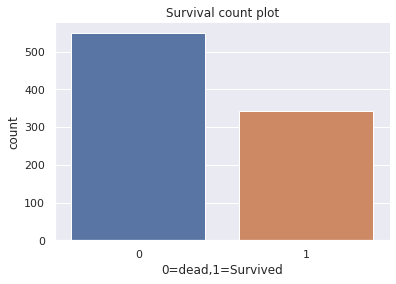

In [ ]:
p=sns.countplot(x='Survived',data=titanic)
p.set_xlabel('0=dead,1=Survived')
p.set_title('Survival count plot')
sns.despine()

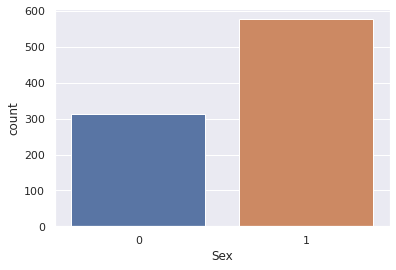

In [ ]:
sns.countplot(x='Sex',data=titanic)

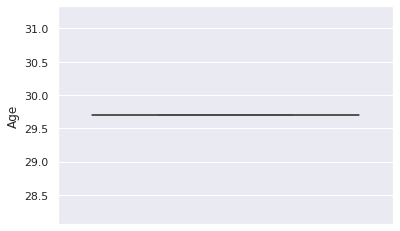

In [ ]:
sns.boxplot(y='Age',data=titanic)

In [ ]:
titanic.Age.describe()

count    8.910000e+02
mean     2.969912e+01
std      3.021503e-13
min      2.969912e+01
25%      2.969912e+01
50%      2.969912e+01
75%      2.969912e+01
max      2.969912e+01
Name: Age, dtype: float64

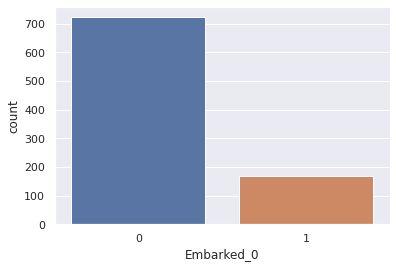

In [ ]:
p=sns.countplot(x='Embarked_0',data=titanic)

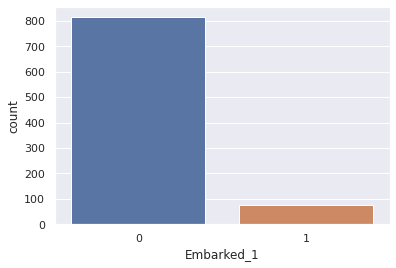

In [ ]:
p=sns.countplot(x='Embarked_1',data=titanic)

In [ ]:
titanic.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_0', 'Embarked_1', 'Embarked_2', 'Embarked_3', 'FamilySize',
       'Gender'],
      dtype='object')